In [ ]:
# Car Fuel Consumption 


In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_excel("measurements2.xlsx")
print(df)

     distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26         21.5            12      NaN      E10   
1        12.0      4.2     30         21.5            13      NaN      E10   
2        11.2      5.5     38         21.5            15      NaN      E10   
3        12.9      3.9     36         21.5            14      NaN      E10   
4        18.5      4.5     46         21.5            15      NaN      E10   
..        ...      ...    ...          ...           ...      ...      ...   
383      16.0      3.7     39         24.5            18      NaN     SP98   
384      16.1      4.3     38         25.0            31       AC     SP98   
385      16.0      3.8     45         25.0            19      NaN     SP98   
386      15.4      4.6     42         25.0            31       AC     SP98   
387      14.7      5.0     25         25.0            30       AC     SP98   

     AC  rain  sun  refill liters refill gas  
0     0     0   

*distance: Distance traveled (km).

*consume: Fuel consumption (L/100 km).

*speed: Average driving speed (km/h).

*temp_inside: Set temperature inside the car (degrees Celsius).

*temp_outside: Outside temperature measured at the end of the drive (degrees Celsius).

*specials: Special conditions. "rain" for rain, "snow" for snow, "AC" for air conditioning usage.

*gas_type: Type of gasoline selected during the last refueling.

*AC: 1 - Air conditioning was used. / 0 - Air conditioning was not used.

*rain: 1 - Rain or snow was present. / 0 - No rain or snow.

*sun: 1 - It was sunny and warm. / 0 - Otherwise

## Confirmation of Correlation.

# Scatterplot Matrix of Continuous Variables.
consume, distance, speed, temp_inside, temp_outside

array([[<Axes: xlabel='consume', ylabel='consume'>,
        <Axes: xlabel='distance', ylabel='consume'>,
        <Axes: xlabel='speed', ylabel='consume'>,
        <Axes: xlabel='temp_inside', ylabel='consume'>,
        <Axes: xlabel='temp_outside', ylabel='consume'>],
       [<Axes: xlabel='consume', ylabel='distance'>,
        <Axes: xlabel='distance', ylabel='distance'>,
        <Axes: xlabel='speed', ylabel='distance'>,
        <Axes: xlabel='temp_inside', ylabel='distance'>,
        <Axes: xlabel='temp_outside', ylabel='distance'>],
       [<Axes: xlabel='consume', ylabel='speed'>,
        <Axes: xlabel='distance', ylabel='speed'>,
        <Axes: xlabel='speed', ylabel='speed'>,
        <Axes: xlabel='temp_inside', ylabel='speed'>,
        <Axes: xlabel='temp_outside', ylabel='speed'>],
       [<Axes: xlabel='consume', ylabel='temp_inside'>,
        <Axes: xlabel='distance', ylabel='temp_inside'>,
        <Axes: xlabel='speed', ylabel='temp_inside'>,
        <Axes: xlabel='temp_ins

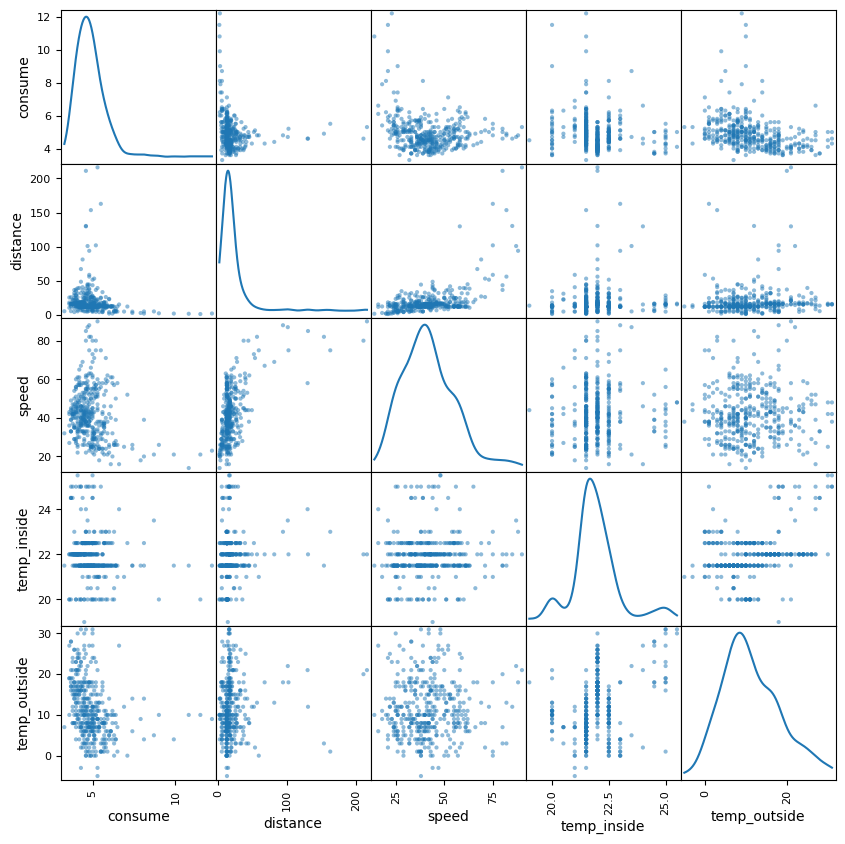

In [3]:
df_scatter = df.loc[:,["consume", "distance", "speed", "temp_inside", "temp_outside"]]
pd.plotting.scatter_matrix(df_scatter, diagonal="kde", figsize=(10.0, 10.0))

There is no significant skewness in the distribution of the data.

Variables that seem to have a correlation with "consume" are:

distance
speed
However, it should be noted that there is a strong correlation between "distance" and "speed."．

In [5]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
df1=df.drop(["specials","gas_type","refill liters","refill gas"], axis=1)

In [7]:
df1.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.075305,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.161991,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.059725,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120
temp_outside,0.088175,-0.320811,0.015411,0.361308,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,0.096591,-0.035408,0.297775,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.037356,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.246120,0.346903,0.088598,-0.112650,1.000000


<Axes: >

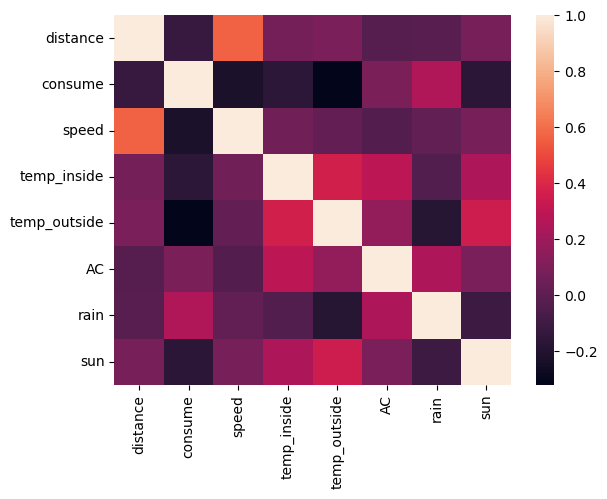

In [8]:
sns.heatmap(df1.corr())

## "Distribution of categorical variables

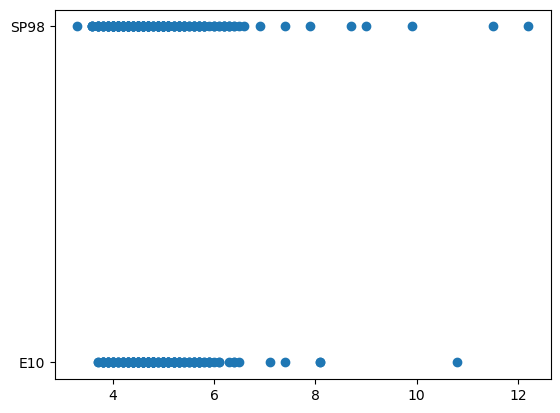

In [9]:
# gas_type
# df[["consume", "gas_type"]].boxplot(by="gas_type")
plt.scatter(df["consume"],df["gas_type"])

In [10]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


<Axes: title={'center': 'consume'}, xlabel='[gas_type]'>

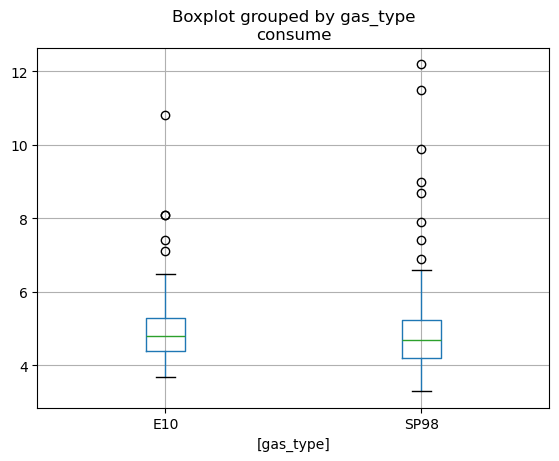

In [11]:
df[["consume", "gas_type"]].boxplot(by="gas_type")

In [12]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


It appears that there is no significant difference in the relationship between "consume" and "gas_type" in the given context.．

<Axes: title={'center': 'consume'}, xlabel='[AC]'>

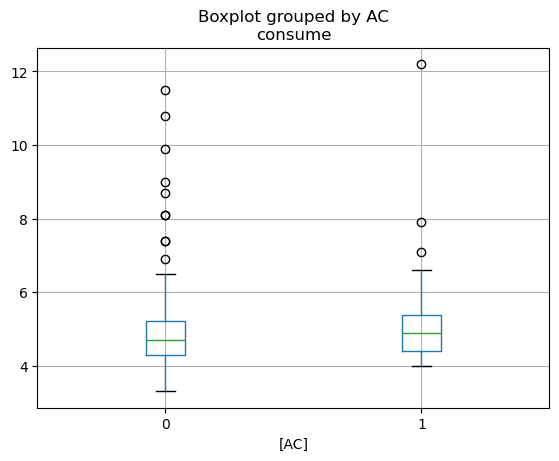

In [13]:
# AC
df[["consume", "AC"]].boxplot(by="AC")

In that case, if there is only a slight difference observed in the relationship between "consume" and "gas_type," it suggests that the choice of "gas_type" may have a minimal impact on the fuel consumption.

<Axes: title={'center': 'consume'}, xlabel='[rain]'>

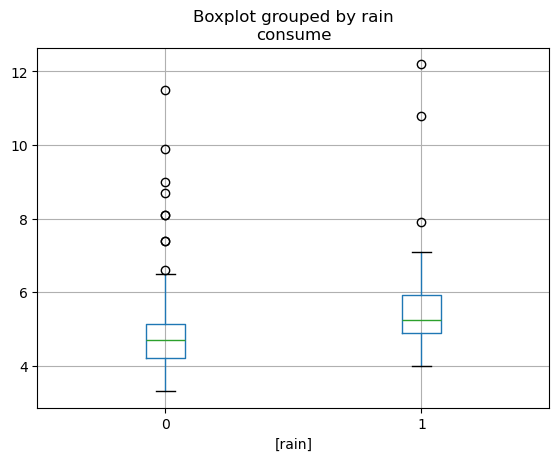

In [14]:
# rain
df[["consume", "rain"]].boxplot(by="rain")


If the impact of "gas_type" is observed to be significant in comparison to the previous variables, it suggests that the type of fuel has a notable influence on fuel consumption.

<Axes: title={'center': 'consume'}, xlabel='[sun]'>

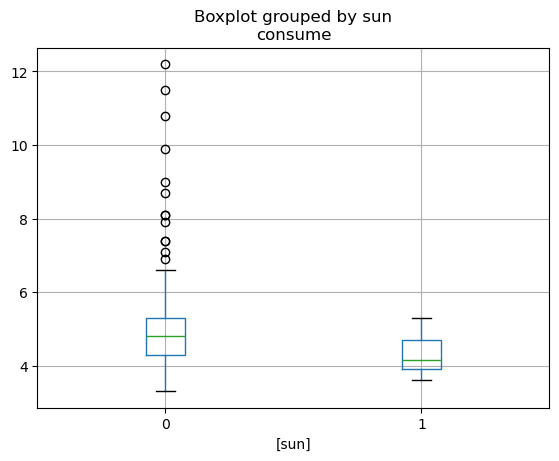

In [22]:
# sun
df[["consume", "sun"]].boxplot(by="sun")

If the impact of "gas_type" also appears to be relatively large, it suggests that the choice of fuel type has a significant influence on fuel consumption.


Based on the analysis indicating the significant influence of the following three variables, distance, rain, and sun, you can consider conducting a linear regression analysis on them. By performing a linear regression, you can explore the relationship between these variables and fuel consumption in a more detailed manner. This analysis will help you understand how these variables contribute to the variation in fuel consumption and provide insights into their individual impacts.

### distance

In [ ]:
x = df["distance"].values
y = df["consume"].values

plt.scatter(x, y)
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

If the relationship between the variables (distance, rain, sun) and fuel consumption appears to be decreasing, you can consider taking the reciprocal of the variables and then perform the linear regression analysis. Taking the reciprocal can help examine if an inverse relationship exists, where higher values of the variables correspond to lower fuel consumption. This transformation can provide additional insights into the nature of the relationship between these variables and fuel consumption.

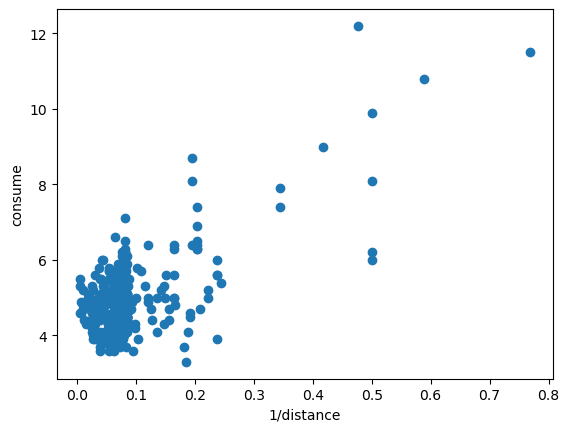

In [17]:
plt.scatter(np.reciprocal(x), y)
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.show()

In [70]:
x=np.reciprocal(x)
regr=LinearRegression()
x_train=x.reshape(-1,1)
regr.fit(x_train,y)

LinearRegression()

In [63]:
df1.fillna(df1.mean())


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0
386,15.4,4.6,42,25.0,31,1,0,0


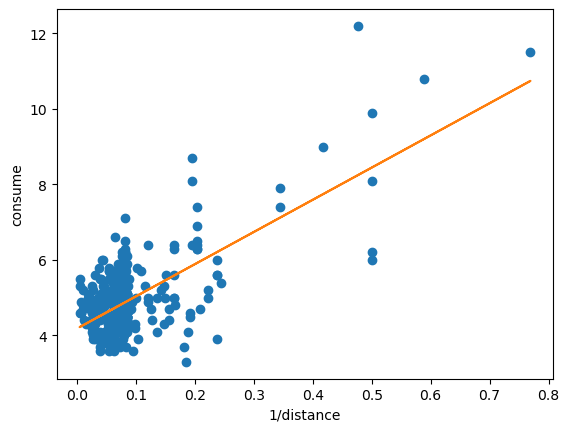

In [25]:
consume_pred = regr.intercept_ + regr.coef_[0] * x

plt.plot(x, y, "o")
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.plot(x, consume_pred)
plt.show()

# Evaluation function for accuracy.


In [20]:
import numpy as np
import math

def MAE(pred, reference):
    assert len(pred) == len(reference)
    diff = pred - reference
    diff = np.abs(diff)
    return diff.mean()

def MSE(pred, reference):
    assert len(pred) == len(reference)
    diff = pred - reference
    diff = diff**2
    return diff.mean()

def RMSE(pred, reference):
    return math.sqrt(MSE(pred, reference))

# Example usage
pred_values = np.array([1, 2, 3, 4, 5])
ref_values = np.array([2, 4, 6, 8, 10])

mae = MAE(pred_values, ref_values)
mse = MSE(pred_values, ref_values)
rmse = RMSE(pred_values, ref_values)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 3.0
MSE: 11.0
RMSE: 3.3166247903554


# Evaluation Using library accuracy

In [21]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example usage
pred_values = np.array([1, 2, 3, 4, 5])
ref_values = np.array([2, 4, 6, 8, 10])

mae = mean_absolute_error(ref_values, pred_values)
mse = mean_squared_error(ref_values, pred_values)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 3.0
MSE: 11.0
RMSE: 3.3166247903554
